In [22]:
import json
data = json.load(open('ices-headcount.json', 'r'))

In [53]:
counts = []
bins = {'top':[],'tm':[],'mid':[],'mb':[],'bottom':[]}
bins_percent = {'top':[],'tm':[],'mid':[],'mb':[],'bottom':[]}
index = []
for department, values in data.items():
    try:
        staff = (values["Academic Staff Headcount"][1] - values["Academic Profnl Headcount"][1], department)
        counts.append(staff)
        bins['top'].append(round(staff[0] * (values["Top 10% Faculty"][1] or 0) / 100))
        bins['tm'].append(round(staff[0] * (values["Next 20% Faculty"][1] or 0) / 100))
        bins['mid'].append(round(staff[0] * (values["Middle 40% Faculty"][1] or 0) / 100))
        bins['mb'].append(round(staff[0] * (values["Middle Bottom 20% Faculty"][1] or 0) / 100))
        bins['bottom'].append(round(staff[0] * (values["Bottom 10% Faculty"][1] or 0) / 100))
        bins_percent['top'].append(values["Top 10% Faculty"][1] or 0)
        bins_percent['tm'].append(values["Next 20% Faculty"][1] or 0)
        bins_percent['mid'].append(values["Middle 40% Faculty"][1] or 0)
        bins_percent['mb'].append(values["Middle Bottom 20% Faculty"][1] or 0)
        bins_percent['bottom'].append(values["Bottom 10% Faculty"][1] or 0)
        
        index.append(department)
    except TypeError as e:
        continue
    except KeyError:
        continue
print(bins)

{'top': [0, 4, 0, 4, 1, 2, 0, 7, 4, 0, 0, 5, 5, 6, 0, 1, 2, 1, 4, 16, 0, 11, 4, 5, 21, 3, 0, 15, 7, 20, 4, 5, 4, 2, 2, 4, 0, 3, 0, 2, 1, 0, 2, 16, 0, 6, 1, 2, 1, 4, 1, 3, 3, 5, 0, 4, 1, 3, 1, 0, 0, 0, 19, 13, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 4, 2, 0, 0, 0, 0, 8, 0, 0, 0, 3, 3, 0, 5], 'tm': [1, 7, 0, 12, 5, 11, 3, 19, 11, 0, 0, 9, 9, 16, 3, 4, 4, 4, 8, 30, 0, 20, 8, 10, 34, 12, 1, 17, 18, 43, 2, 11, 13, 3, 3, 9, 3, 4, 0, 5, 3, 5, 8, 24, 0, 16, 1, 5, 2, 10, 6, 5, 3, 10, 1, 11, 2, 5, 3, 0, 0, 1, 30, 7, 1, 1, 0, 0, 19, 0, 3, 3, 3, 2, 0, 1, 3, 1, 1, 1, 2, 0, 6, 4, 0, 0, 0, 12, 4, 4, 0, 0, 0, 23, 0, 0, 0, 4, 10, 0, 17], 'mid': [2, 20, 0, 32, 18, 14, 10, 23, 19, 0, 0, 27, 28, 46, 7, 7, 6, 8, 16, 42, 0, 38, 17, 12, 45, 17, 2, 41, 18, 42, 9, 22, 23, 2, 9, 16, 5, 9, 0, 8, 6, 5, 13, 31, 0, 21, 4, 5, 1, 13, 7, 16, 12, 34, 1, 19, 4, 13, 6, 1, 0, 4, 28, 12, 1, 2, 22, 0, 0, 24, 2, 3, 4, 7, 0, 1, 16, 5, 4, 4, 12, 0, 5, 7, 0, 0, 0, 25, 11, 9, 0, 0, 17, 52, 16, 0, 0, 

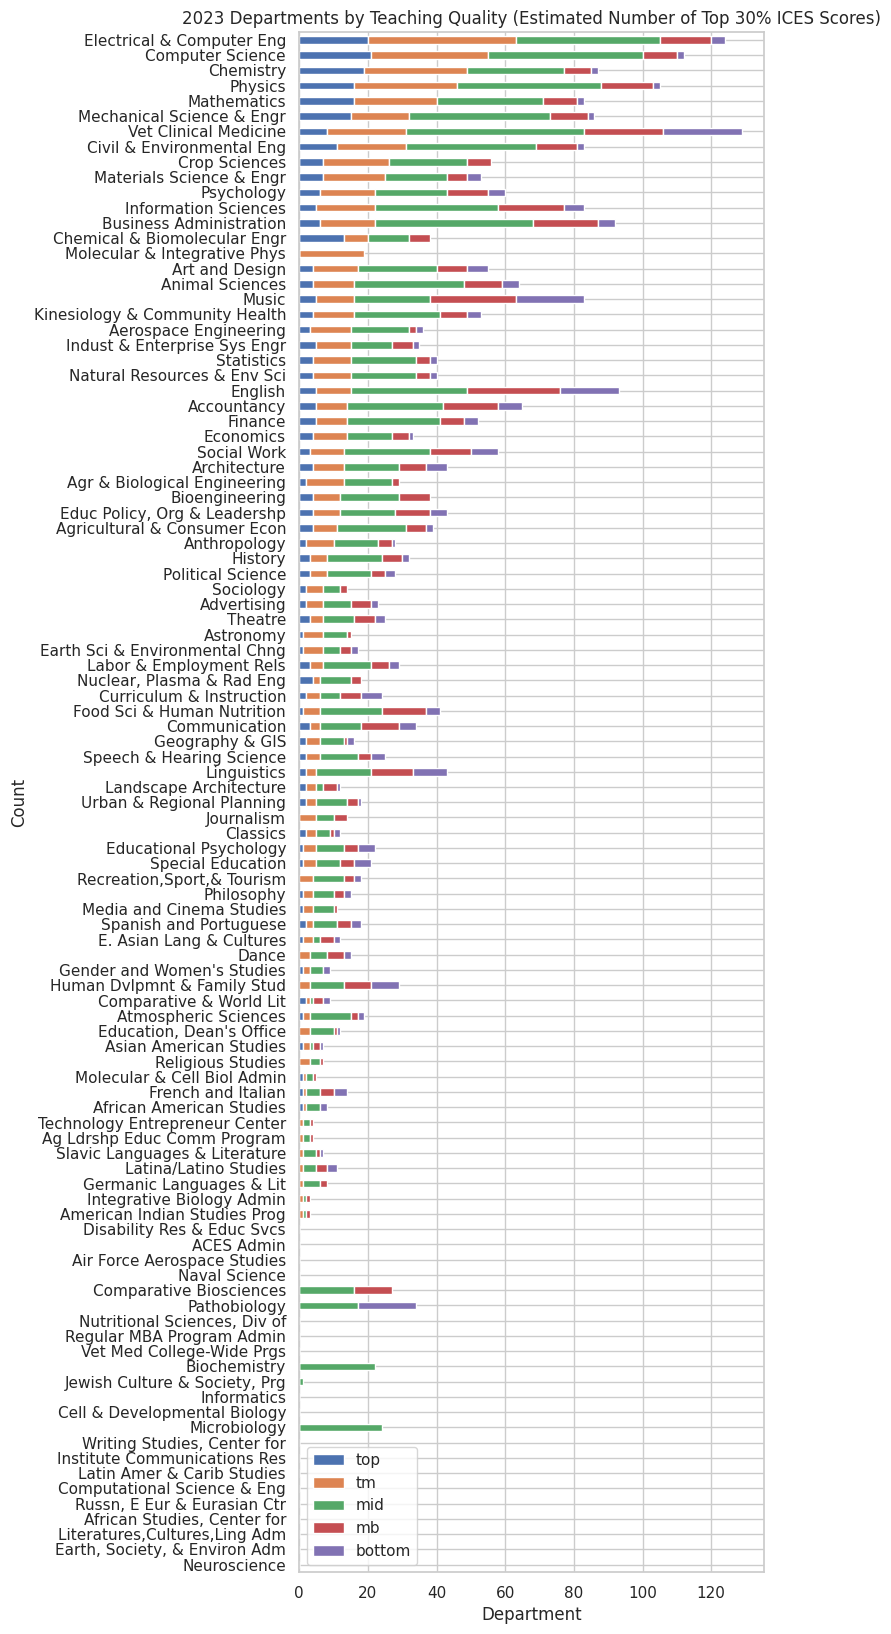

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Sort bins/index by the 'top' bin count


df = pd.DataFrame(bins, index=index)
# sort df by the sum of the 'top' + 'tm' columns
df = df.assign(total=lambda x: x['top'] + x['tm']).sort_values(by='total', ascending=True)
# drop total column
df = df.drop('total', axis=1)
df.plot(kind='barh', stacked=True, figsize=(6,20))
# Plot data with seaborn using histogram
plt.xlabel('Department')
plt.ylabel('Count')
# title of plot
plt.title('2023 Departments by Teaching Quality (Estimated Number of Top 30% ICES Scores)')
plt.show()


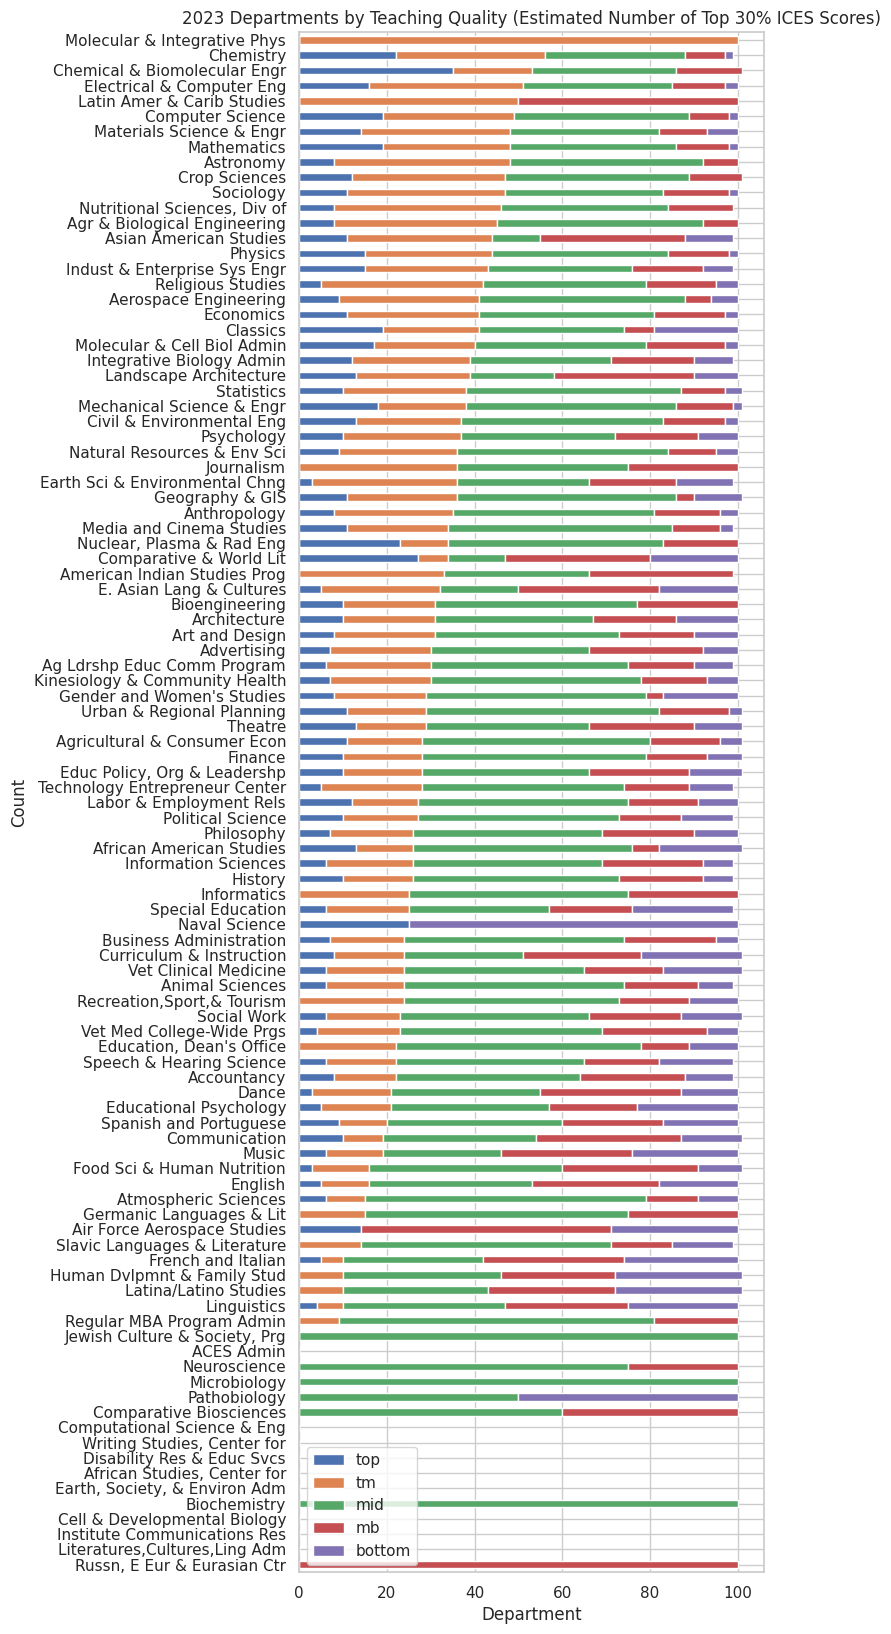

In [69]:

df = pd.DataFrame(bins_percent, index=index)
# sort df by the sum of the 'top' + 'tm' columns
df = df.assign(total=lambda x: x['top'] + x['tm']).sort_values(by='total', ascending=True)
# drop total column
df = df.drop('total', axis=1)
df.plot(kind='barh', stacked=True, figsize=(6,20))
# Plot data with seaborn using histogram
plt.xlabel('Department')
plt.ylabel('Count')
# title of plot
plt.title('2023 Departments by Teaching Quality')
plt.show()